### Programming for Biomedical Informatics
#### Week 7 Assignment - Building an Autism Gene Protein-Protein Interaction Network

In this weekly mini assignment you will practice building and clustering a network. You can use the code snippet from this week to help.

I have provided an associated data file which is a tab-delimited file 'autism_network.tsv' where the first row contains the field headings

**NetworkX - Network Analysis in Python - [https://networkx.org/documentation/stable/index.html](https://networkx.org/documentation/stable/index.html)**

In [34]:
# read in and look at the data
import pandas as pd

# read in the data
data = pd.read_csv('autism_network.tsv', sep='\t')

# select only the first, second and last columns
data = data.iloc[:, [0, 1, -1]]

#rename the columns as 'protein1', 'protein2', 'score'
data.columns = ['protein1', 'protein2', 'score']

data.head()

,protein1,protein2,score
0,AARS1,PARS2,0.890
1,ACTL6B,KDM5C,0.532
2,ADSL,DALRD3,0.637
3,ADSL,PDE4D,0.900
4,ADSL,DPYD,0.581


Number of nodes: 123
Number of edges: 415


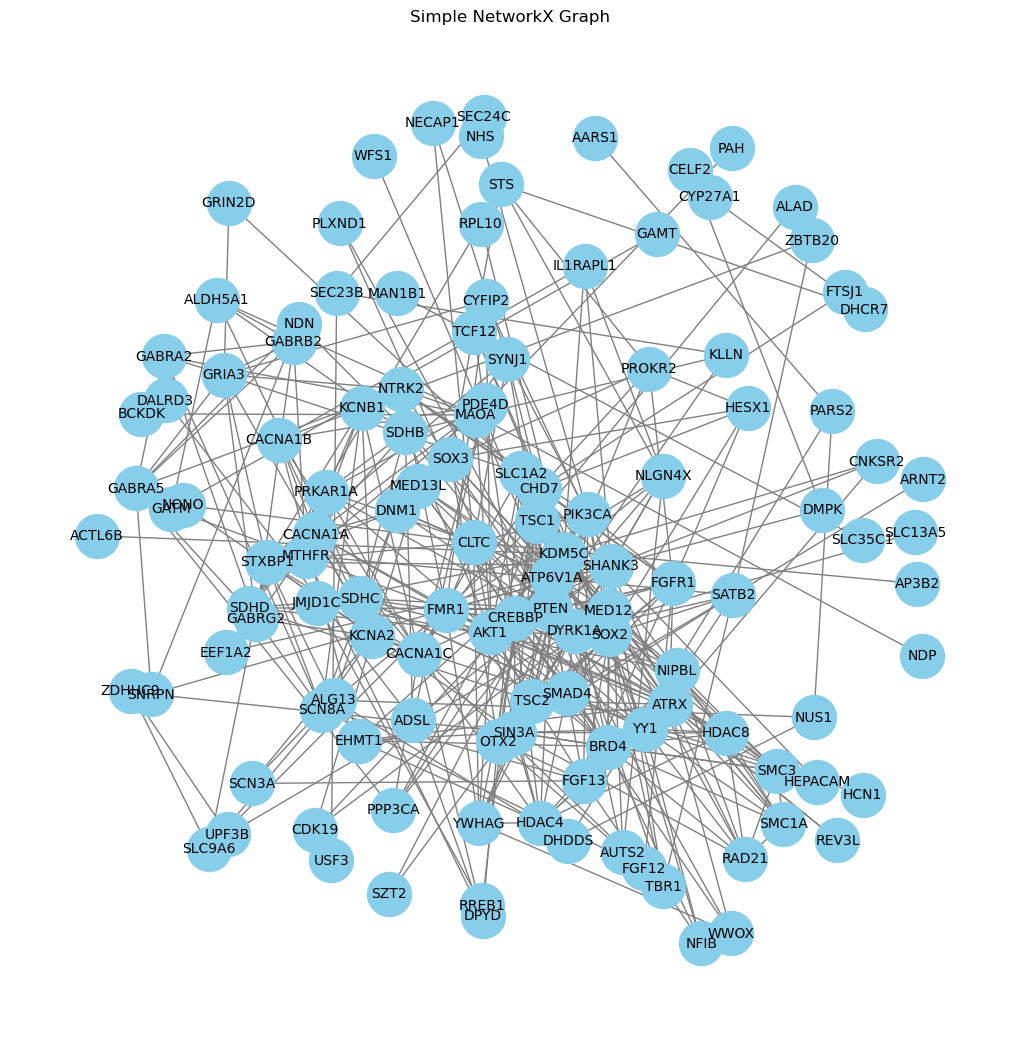

In [35]:
# convert the data into a network with networkx adding the score column as an edge attribute
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(data, source='protein1', target='protein2',edge_attr='score')

# print the number of nodes and edges
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

#draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=20, k=0.8)
nx.draw(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=1000, font_size=10, pos=pos)
plt.title("Simple NetworkX Graph")
plt.show()

In [36]:
# which node has the highest degree?

#sort the genes (node names) by degree
sorted_list = sorted(G.degree(), key=lambda item: item[1] , reverse=True)

# print out the top10 using prettytable
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Gene","Degree"]
for gene in sorted_list[:10]:
    x.add_row(gene)
print(x)

+--------+--------+
|  Gene  | Degree |
+--------+--------+
|  PTEN  |   29   |
|  AKT1  |   27   |
|  SOX2  |   22   |
| CREBBP |   21   |
|  ATRX  |   21   |
|  BRD4  |   20   |
|  FMR1  |   20   |
| KDM5C  |   18   |
|  YY1   |   17   |
| DYRK1A |   17   |
+--------+--------+


In [37]:
# we're going to cluster the networkx modularity clustering algorithm
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)

# print the number of communities
print('The network has '+str(len(communities))+' communities.\n')

# create sub-grpahs for each community
subgraphs = []
for community in communities:
    subgraphs.append(G.subgraph(community))
    
# print the number of nodes in each community
for i, subgraph in enumerate(subgraphs):
    print('Community '+str(i+1)+' has '+str(subgraph.number_of_nodes())+' nodes.')

The network has 9 communities.

Community 1 has 35 nodes.
Community 2 has 24 nodes.
Community 3 has 24 nodes.
Community 4 has 12 nodes.
Community 5 has 11 nodes.
Community 6 has 8 nodes.
Community 7 has 4 nodes.
Community 8 has 3 nodes.
Community 9 has 2 nodes.


##### <font color='darkblue'>Plot the Graph with Clusters Coloured</font>

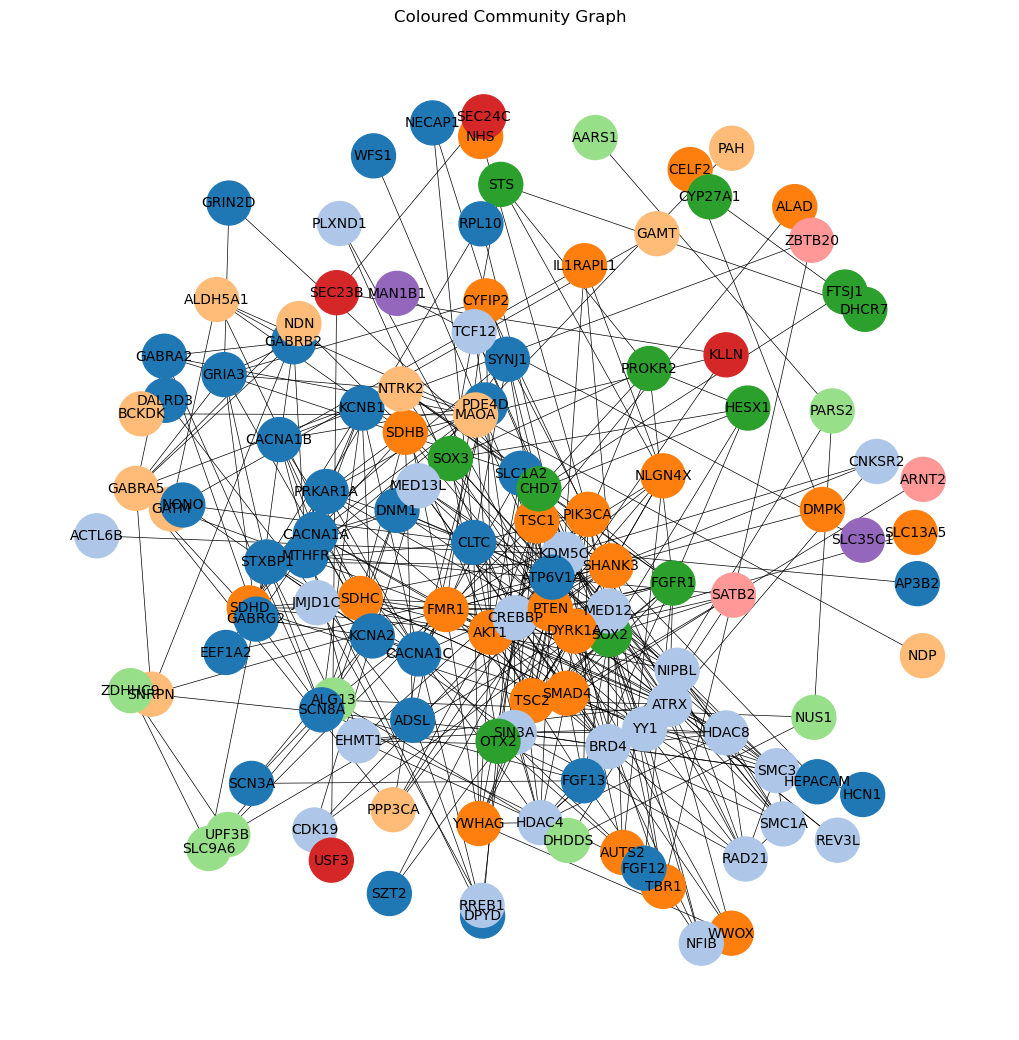

In [38]:
# create a dict with the gene_id as key and community membership list as value
communityDict = dict()

# loop through the communities
for i, community in enumerate(communities):
    # loop through the diseases in the community
    for node_id in community:
        # add the disease and community to the dictionary
        communityDict[node_id] = i

# plot the graph with the communities coloured
# create a list as long as the number of communities in the graph, use a pallette of colours and generate a list of colours
communityColours = plt.cm.tab20.colors[:len(communities)]

# create a list of the node colours
nodeColours = [communityColours[communityDict[node]] for node in G.nodes()]

# create a list of the node labels
nodeLabels = {node:node for node in G.nodes()}

# choose a layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=20, k=0.8)
nx.draw(G, pos, node_color=nodeColours, with_labels=True, node_size=1000, font_size=10, width=0.5)
plt.title("Coloured Community Graph");

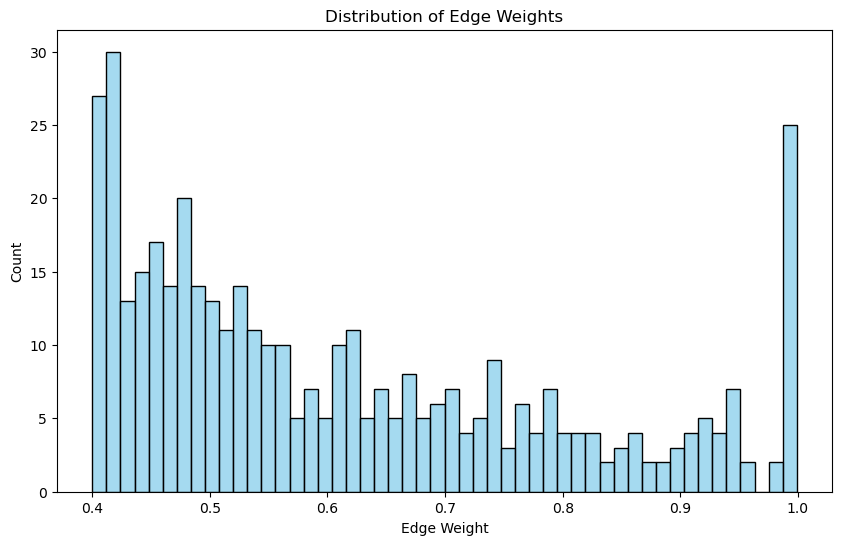

In [43]:
# lets plot the diustribtion of edge weights
import seaborn as sns

# create a list of the edge weights
edgeWeights = [score for _, _, score in G.edges(data='score')]

# plot the distribution of edge weights
plt.figure(figsize=(10, 6))
sns.histplot(edgeWeights, bins=50, color='skyblue')
plt.title('Distribution of Edge Weights')
plt.xlabel('Edge Weight')
plt.ylabel('Count')
plt.show()

Number of nodes: 72
Number of edges: 83


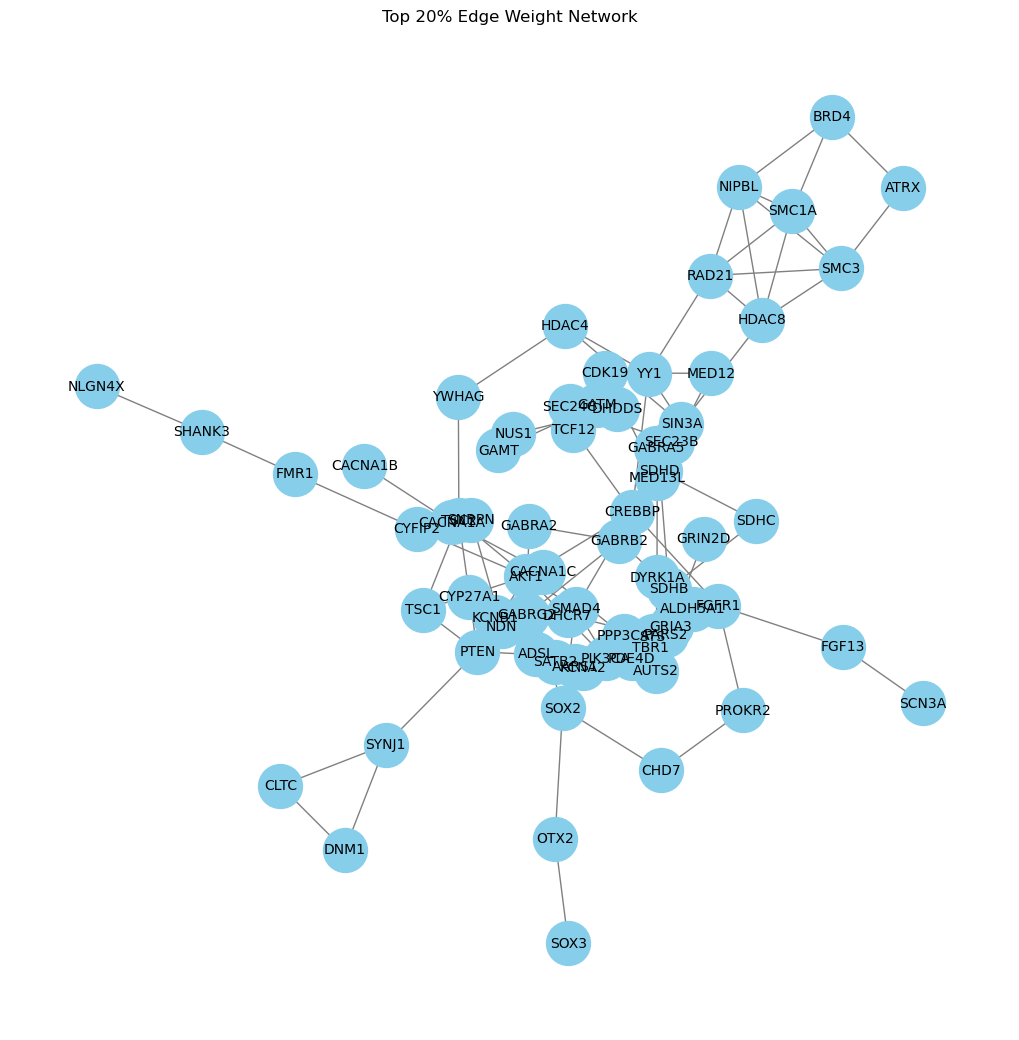

The network has 20 communities.

Community 1 has 9 nodes.
Community 2 has 7 nodes.
Community 3 has 6 nodes.
Community 4 has 5 nodes.
Community 5 has 5 nodes.
Community 6 has 5 nodes.
Community 7 has 4 nodes.
Community 8 has 4 nodes.
Community 9 has 3 nodes.
Community 10 has 3 nodes.
Community 11 has 3 nodes.
Community 12 has 2 nodes.
Community 13 has 2 nodes.
Community 14 has 2 nodes.
Community 15 has 2 nodes.
Community 16 has 2 nodes.
Community 17 has 2 nodes.
Community 18 has 2 nodes.
Community 19 has 2 nodes.
Community 20 has 2 nodes.


In [68]:
# create another graph using only the top 20% of edges
# sort the edges by weight
sortedEdges = sorted(G.edges(data=True), key=lambda x: x[2]['score'], reverse=True)

# calculate the number of edges to keep
numEdges = int(len(sortedEdges) * 0.2)

# create a new graph
G_top20 = nx.Graph()

# add the top 10% of edges to the new graph
for edge in sortedEdges[:numEdges]:
    G_top20.add_edge(edge[0], edge[1], score=edge[2]['score'])

# print the number of nodes and edges
print('Number of nodes:', G_top20.number_of_nodes())
print('Number of edges:', G_top20.number_of_edges())

# draw the graph
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G_top20,weight='score')
nx.draw(G_top20, with_labels=True, node_color="skyblue", edge_color="gray", node_size=1000, font_size=10, pos=pos)
plt.title("Top 20% Edge Weight Network")
plt.show()

# we're going to cluster the networkx modularity clustering algorithm
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G_top20)

# print the number of communities
print('The network has '+str(len(communities))+' communities.\n')

# create sub-grpahs for each community
subgraphs = []
for community in communities:
    subgraphs.append(G_top20.subgraph(community))
    
# print the number of nodes in each community
for i, subgraph in enumerate(subgraphs):
    print('Community '+str(i+1)+' has '+str(subgraph.number_of_nodes())+' nodes.')


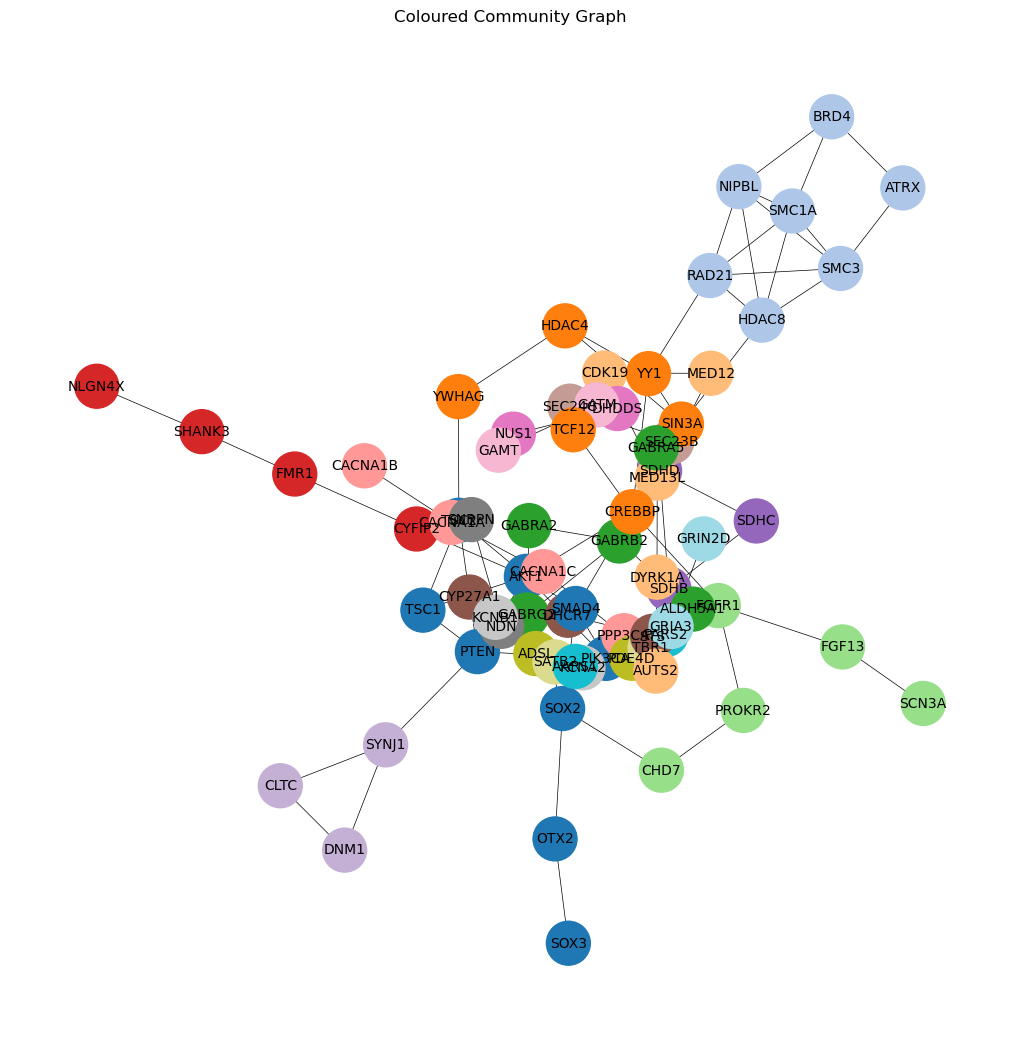

In [67]:
# create a dict with the gene_id as key and community membership list as value
communityDict = dict()

# loop through the communities
for i, community in enumerate(communities):
    # loop through the diseases in the community
    for node_id in community:
        # add the disease and community to the dictionary
        communityDict[node_id] = i

# plot the graph with the communities coloured
# create a list as long as the number of communities in the graph, use a pallette of colours and generate a list of colours
communityColours = plt.cm.tab20.colors[:len(communities)]

# create a list of the node colours
nodeColours = [communityColours[communityDict[node]] for node in G_top20.nodes()]

# create a list of the node labels
nodeLabels = {node:node for node in G.nodes()}

# choose a layout
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G_top20, weight='score')   
nx.draw(G_top20, pos, node_color=nodeColours, with_labels=True, node_size=1000, font_size=10, width=0.5)
plt.title("Coloured Community Graph");